- Dataset Link - 
https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction

In [1]:
# importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Column Description
-The "last_evaluation" column in the employee retention dataset represents the employee's most recent performance evaluation score, which is a decimal number between 0 and 1.

In this dataset, a value of 0 represents the lowest possible evaluation score, and a value of 1 represents the highest possible score. The decimal point in the score indicates the level of precision in the evaluation, with more decimal places indicating a more granular and precise evaluation.

For example, an employee with a "last_evaluation" score of 0.87 has received a relatively high evaluation score, with a level of precision of two decimal places. This score could have been derived from a combination of factors such as productivity, quality of work, job knowledge, and communication skills, among others, which are typically evaluated during an employee's performance review.

##### 1. Data pre-processing.

In [3]:
# Remove any rows with missing data
df.dropna(inplace=True)

In [4]:
# encode categorical variables using one hot encoding
categorical_columns = ["Department","salary"]
df = pd.get_dummies(df, columns= categorical_columns)


#### 2. Feature Engineering
Feature engineering on the dataframe can be done by following steps

- Create a new feature called "productivity" by dividing the "average_montly_hours" column by the "time_spend_company" column. This feature can represent the employee's average monthly productivity, taking into account the amount of time they have spent at the company.



In [5]:
# assuming time spend company denotes year = multiply by 12 to get months
df['productivity'] = df['average_montly_hours'] / (12*df['time_spend_company'])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,productivity
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,4.361111
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,3.638889
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,5.666667
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,3.716667
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,4.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,4.194444
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,4.444444
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,3.972222
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,5.833333


#### 3. Exploratory data analysis
> A. Check for missing values in the dataset using the isnull() and sum() methods from Pandas.

> B. Calculate summary statistics (mean, standard deviation, etc.) for the numerical columns ('satisfaction_level', 'last_evaluation', 'number_project', 

In [10]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department_IT             0
Department_RandD          0
Department_accounting     0
Department_hr             0
Department_management     0
Department_marketing      0
Department_product_mng    0
Department_sales          0
Department_support        0
Department_technical      0
salary_high               0
salary_low                0
salary_medium             0
productivity              0
dtype: int64


In [6]:
# Get summary statistics for numerical columns
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']
print(df[num_cols].describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  
count          14999.000000        14999.000000  
mean             201.050337            3.498233  
std               49.943099            1.460136  
min               96.000000            2.000000  
25%              156.000000            3.000000  
50%              200.000000            3.000000  
75%              245.000000            4.000000  
max              310.000000           10.

> C. Plots histograms of the numerical columns using the hist() method from Matplotlib.

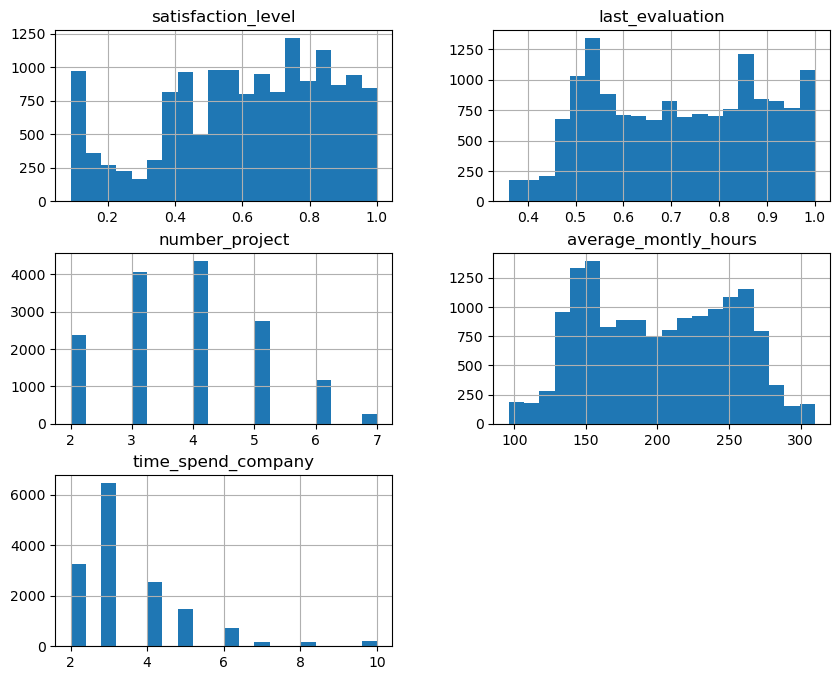

In [7]:
# Plot histograms of numerical columns
df[num_cols].hist(bins=20, figsize=(10,8))
plt.show()

> D. Calculate the correlation matrix of the numerical columns using the corr() method from Pandas and visualize it as a heatmap using the heatmap() method from Seaborn.

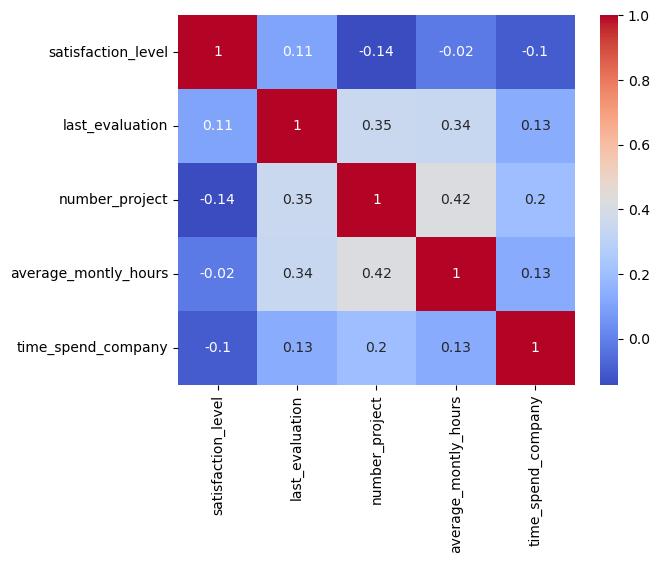

In [8]:
# Plot correlation matrix of numerical columns
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

> E. Plot bar charts for the categorical columns

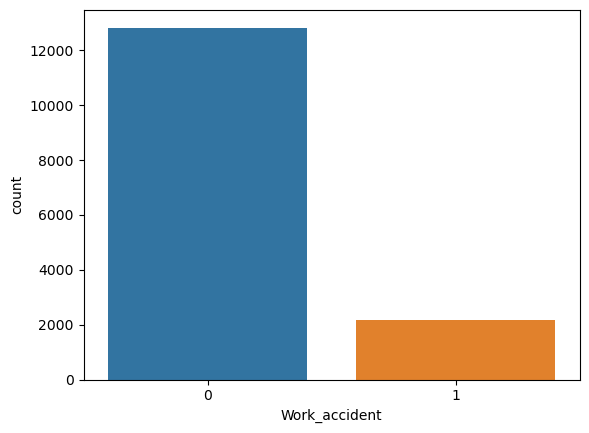

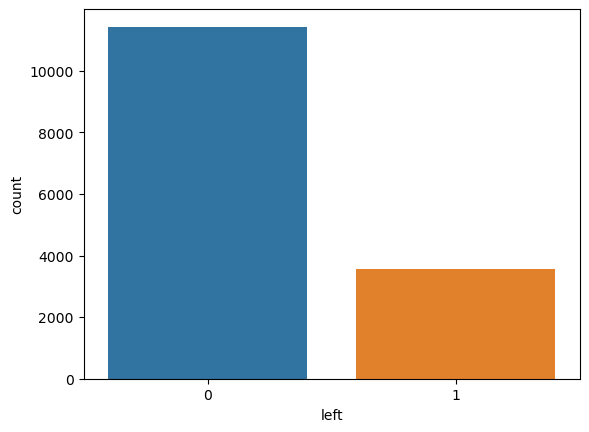

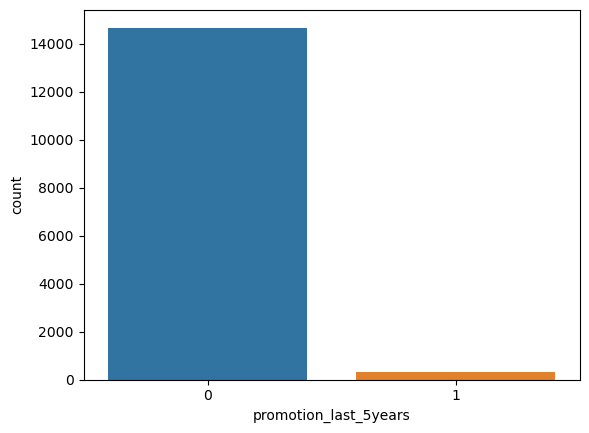

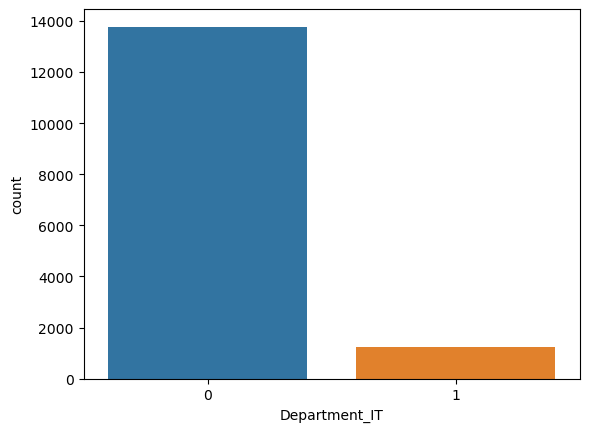

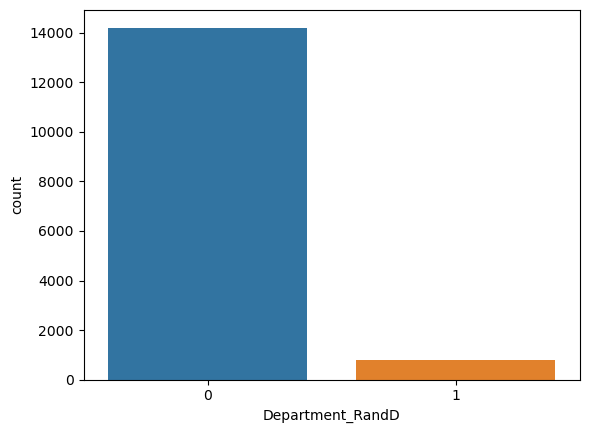

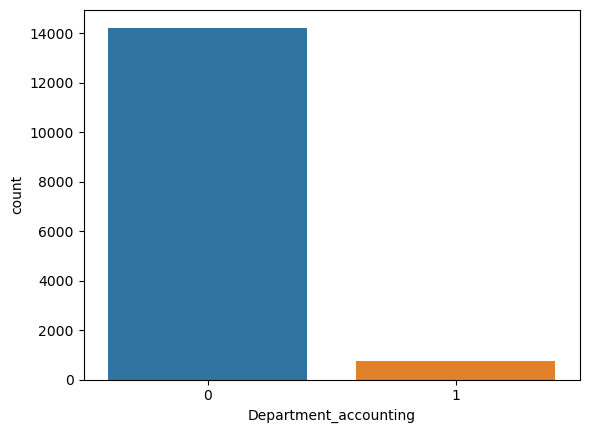

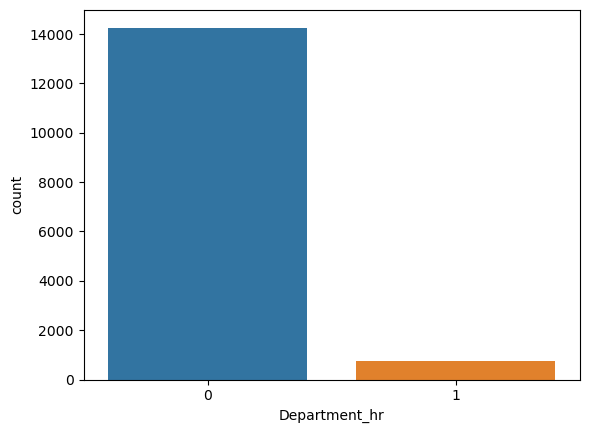

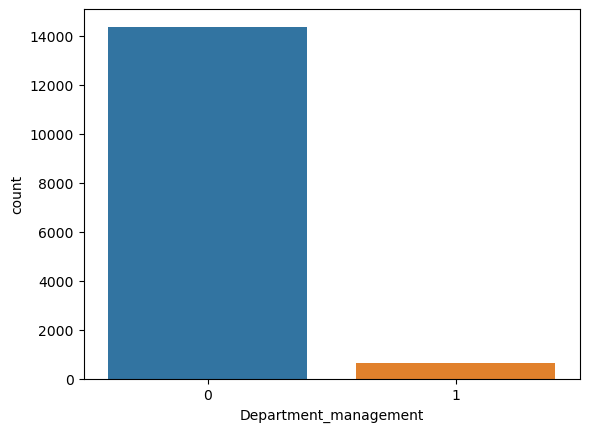

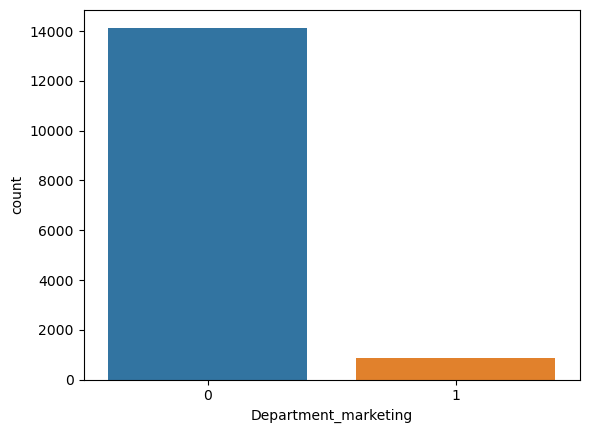

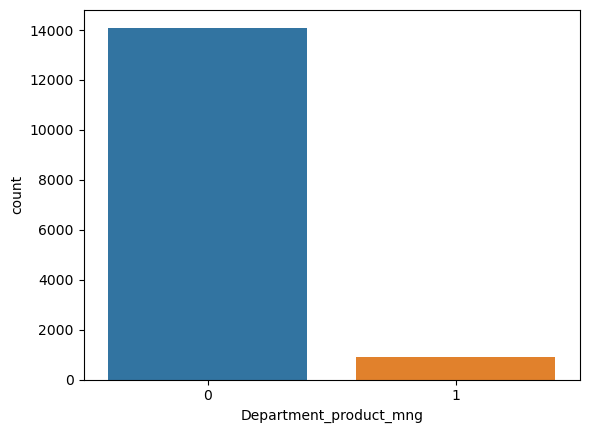

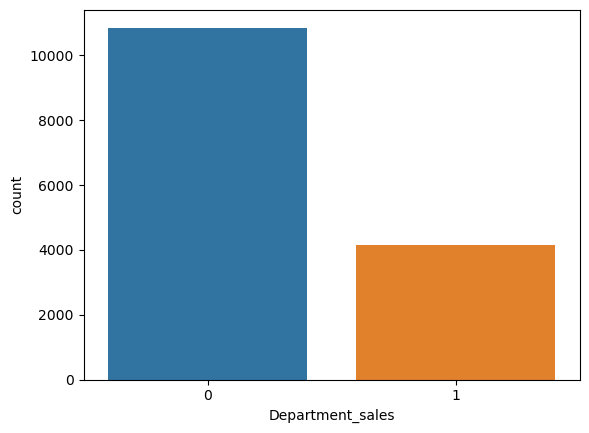

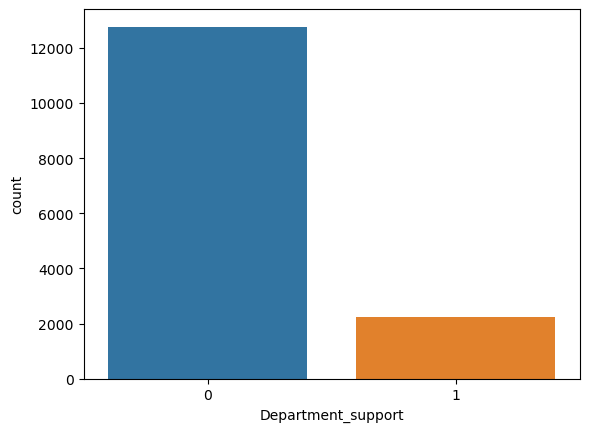

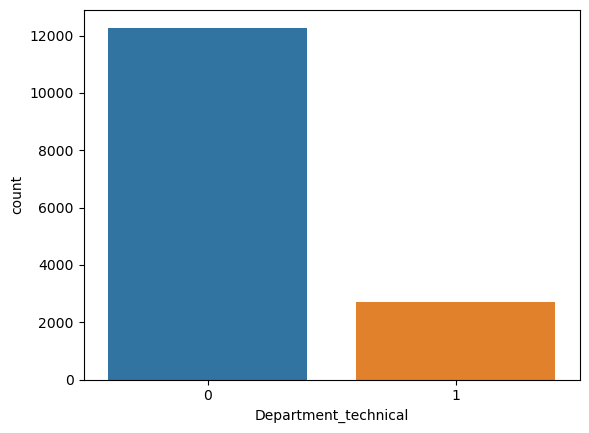

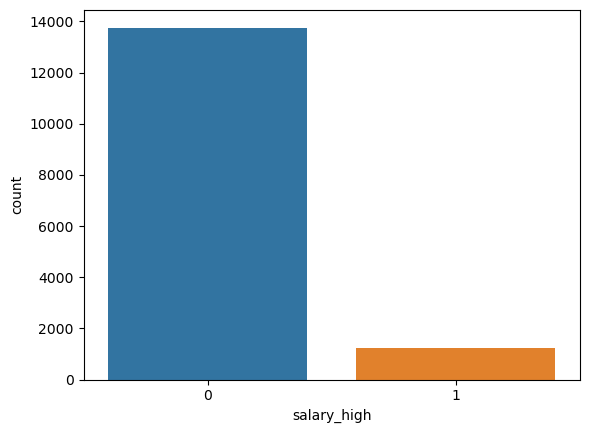

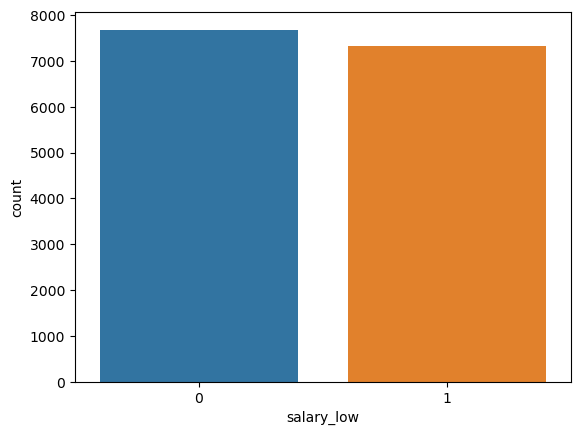

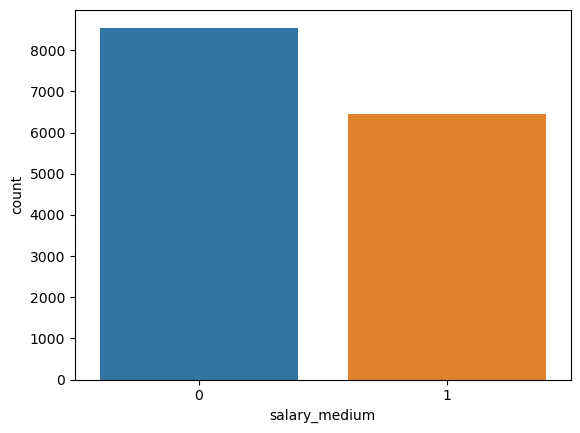

In [9]:
# Plot bar charts of categorical columns
cat_cols = ['Work_accident', 'left', 'promotion_last_5years', 'Department_IT', 'Department_RandD',
            'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing',
            'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical',
            'salary_high', 'salary_low', 'salary_medium']

for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.show()

> F. Plot boxplots of the numerical columns by the 'left' column (which indicates whether the employee has left the company or not) using the boxplot() method from Seaborn.

Box plot is interpreted as following

- The box represents the middle 50% of the data (also known as the interquartile range, or IQR). The bottom of the box represents the 25th percentile (Q1), and the top of the box represents the 75th percentile (Q3).
- The line inside the box represents the median (50th percentile) of the data.
- The whiskers (lines extending from the box) represent the range of the data that is within 1.5 times the IQR. Any data points outside of this range are considered outliers and are plotted individually as points or circles.
- Sometimes, box plots can also have notches on either side of the box. These notches represent the 95% confidence interval for the median.

> Here are some examples of what different box plots can indicate:

- A box that is longer at the top than the bottom (i.e., a skewed distribution) can indicate that the majority of the data is clustered towards the lower end of the range, with a few extreme values at the higher end.
- A box that is short and wide can indicate that the data is spread out over a wide range and is not very concentrated around any one value.
- Outliers that are plotted individually outside of the whiskers can indicate extreme values that are not representative of the majority of the data.

> In general, box plots are useful for quickly visualizing the distribution of numerical data and identifying any outliers or unusual patterns.

- By comparing the box plots for each numerical column, we can get an idea of how each variable may be related to employee retention. For example, if the median value of 'satisfaction_level' is lower for employees who left compared to those who stayed, it may suggest that employee satisfaction is a factor in employee retention. Similarly, if the 'average_montly_hours' box plot for employees who left has a wider range of values and/or more outliers compared to those who stayed, it may suggest that employees who worked longer hours were more likely to leave the company.

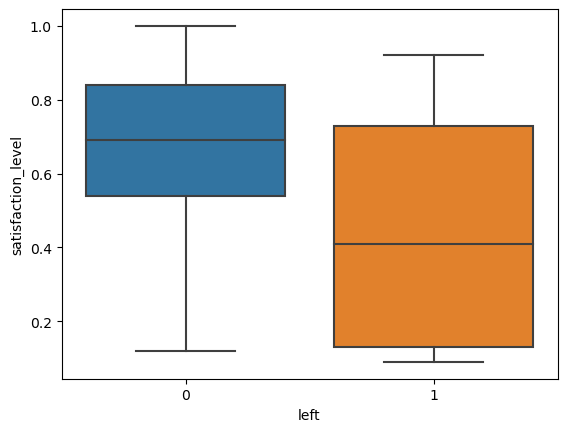

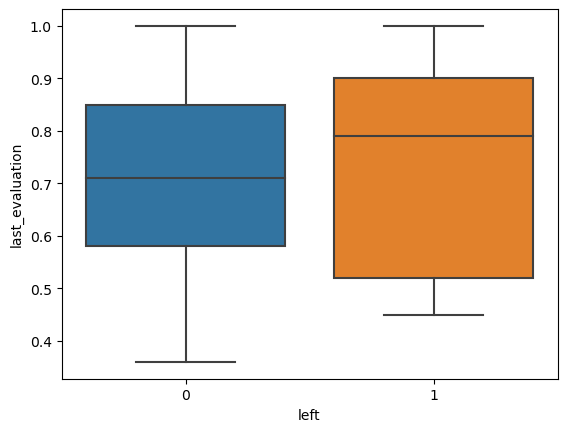

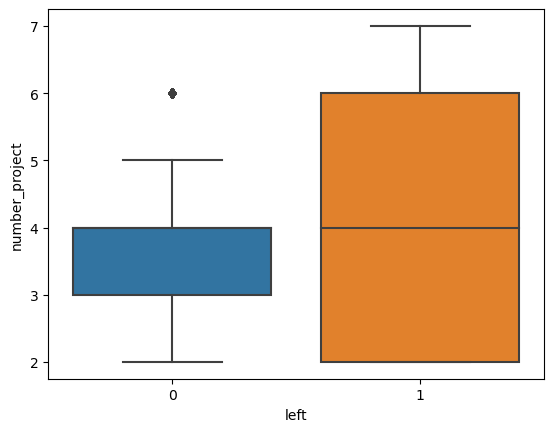

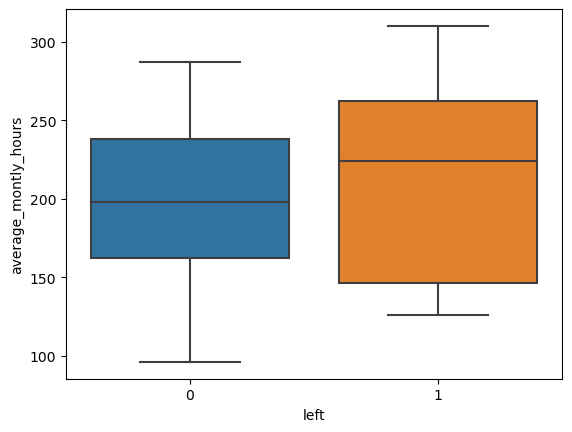

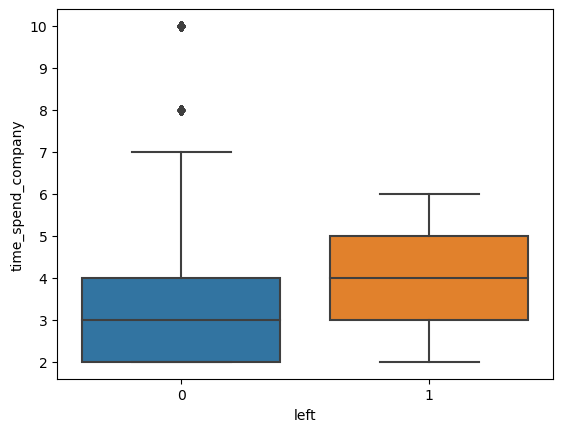

In [11]:
# Plot boxplots of numerical columns by 'left'
num_cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

for col in num_cols:
    sns.boxplot(x='left', y=col, data=df)
    plt.show()

In [ ]:
# scale numeric columns as a pending part of data pre-processing
numeric_columns = ['number_project', 'average_montly_hours','time_spend_company','productivity']
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean())/ df[numeric_columns].std()
df

> G. Plot a bar chart of the 'left' column using the countplot() method from Seaborn.

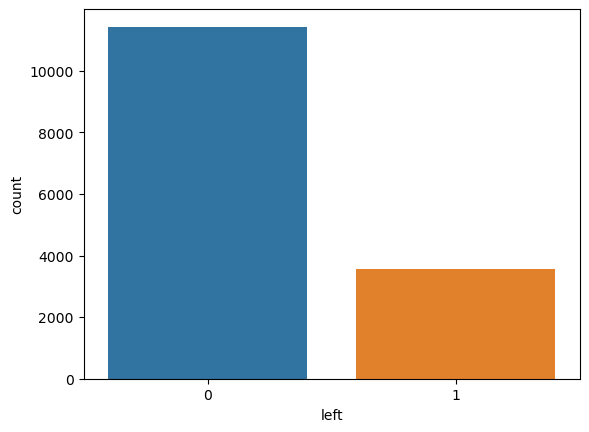

In [12]:
# Plot bar chart of 'left' column
sns.countplot(x='left', data=df)
plt.show()

> H. Calculate and plot churn rate


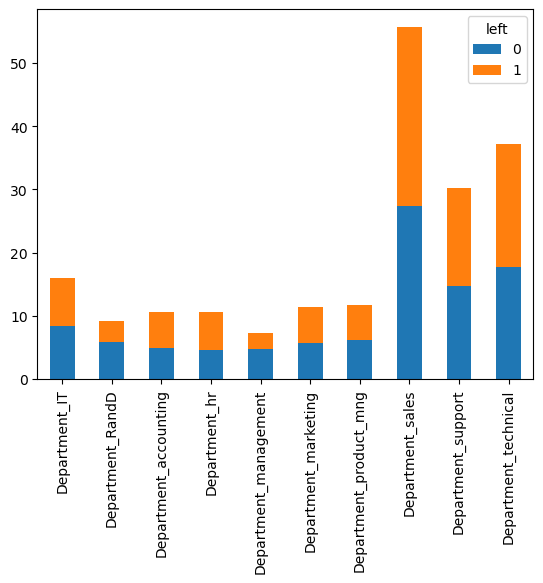

In [13]:
# Calculate and plot churn rate by department
dept_cols = ['Department_IT', 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management',
             'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical']

dept_churn_rate = df.groupby('left')[dept_cols].sum() / df.groupby('left')[dept_cols].count() * 100
dept_churn_rate = dept_churn_rate.transpose()
dept_churn_rate.plot(kind='bar', stacked=True)
plt.show()

In [14]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,productivity
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,4.361111
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,3.638889
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,5.666667
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,3.716667
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,4.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,4.194444
14995,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,4.444444
14996,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,3.972222
14997,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,5.833333


In [15]:
# Scale numeric columns
numeric_columns = ["number_project","average_montly_hours","time_spend_company","productivity"]
df[numeric_columns] = (df[numeric_columns] - df[numeric_columns].mean()) / df[numeric_columns].std()


In [16]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium,productivity
0,0.38,0.53,-1.462814,-0.882010,-0.341224,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,-0.480459
1,0.80,0.86,0.971081,1.220382,1.713379,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,-0.812702
2,0.11,0.88,2.593677,1.420610,0.343644,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0.120133
3,0.72,0.87,0.971081,0.439493,1.028511,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,-0.776922
4,0.37,0.52,-1.462814,-0.841965,-0.341224,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,-0.454902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,-1.462814,-1.002147,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.557131
14995,0.37,0.48,-1.462814,-0.821942,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.442124
14996,0.37,0.53,-1.462814,-1.162329,-0.341224,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.659359
14997,0.11,0.96,1.782379,1.580792,0.343644,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0.196804
